In [44]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [45]:
torch.manual_seed(10)

In [46]:
def train_model(predictive_model, inputs, targets):
    # Initialize lists to store epoch numbers and loss values
    epoch_list, loss_list = [], []
    # Flag to indicate if the training has converged
    has_converged = False
    current_epoch = 0
    max_epochs = 20000
    while not has_converged:
        current_epoch += 1
        # Generate predictions from the model
        predictions = predictive_model(inputs)
        # Calculate loss using the predictions and actual targets
        loss = loss_func(predictions, targets)
        # Reset gradients for the next step
        optimizer.zero_grad()
        # Backpropagate the loss to compute gradients
        loss.backward()
        # Update model parameters
        optimizer.step()
        # Record the current epoch and loss value
        epoch_list.append(current_epoch)
        loss_list.append(loss.detach().numpy())

        # Print loss every 500 epochs to monitor training progress
        if current_epoch % 500 == 0:
            print(f'Epoch: {current_epoch}, Loss = {loss.item():.4f}')

        # Stop condition for max epochs
        if current_epoch == max_epochs:
            print("Maximum epochs reached.")
            has_converged = True

        # Check for convergence based on the loss value and its change over time
        elif (current_epoch > 5) and (loss_list[-1] < 0.001):
            if abs(loss_list[-3] - loss_list[-2]) < 1e-05 and abs(loss_list[-2] - loss_list[-1]) < 1e-05:
                print("Convergence achieved at loss:", loss_list[-1])
                has_converged = True

    return epoch_list, loss_list, predictions


# Function 1

In [47]:
#Coding up the function
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


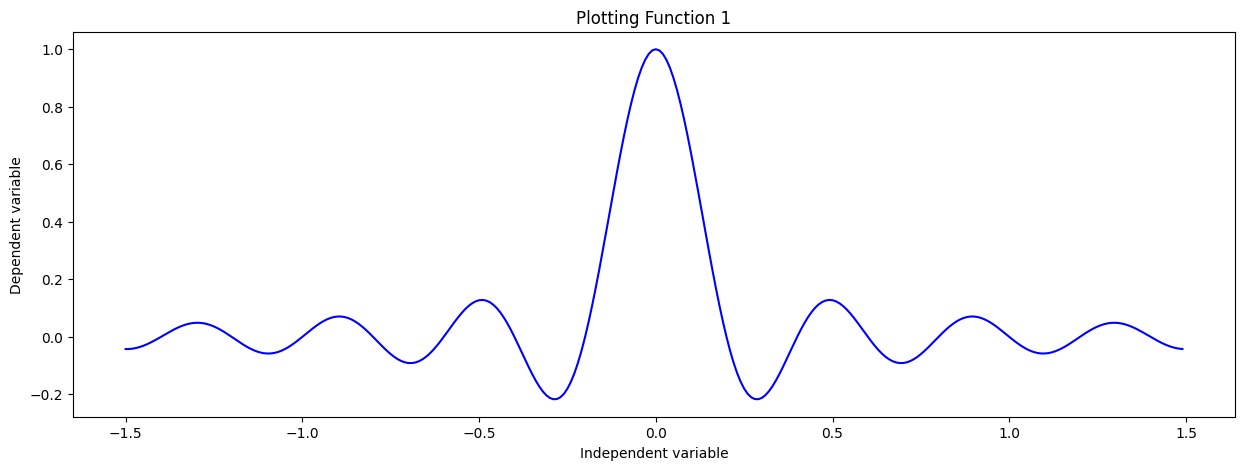

In [48]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(15,5))
plt.plot(x, y, color = "blue")
plt.title('Plotting Function 1')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

## Model 1

In [49]:
#Creating the first model as per the architecture described in report.
class firstModel(nn.Module):
    def __init__(self,):
        super(firstModel, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.linear8 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x

model_1 = firstModel()

In [50]:
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)

#Using mean squared error loss
loss_func = torch.nn.MSELoss()
total_parameters = sum(p.numel() for p in model_1.parameters())
print(total_parameters)
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_1, x, y)

626
Epoch: 500, Loss = 0.0047
Epoch: 1000, Loss = 0.0028
Epoch: 1500, Loss = 0.0022
Epoch: 2000, Loss = 0.0018
Epoch: 2500, Loss = 0.0018
Epoch: 3000, Loss = 0.0014
Epoch: 3500, Loss = 0.0018
Epoch: 4000, Loss = 0.0017
Epoch: 4500, Loss = 0.0013
Epoch: 5000, Loss = 0.0013
Epoch: 5500, Loss = 0.0012
Epoch: 6000, Loss = 0.0012
Epoch: 6500, Loss = 0.0012
Convergence achieved at loss: 0.0009957098


## Model 2

In [51]:
class secondModel(nn.Module):
    def __init__(self,):
        super(secondModel, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.linear5 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x

model_2 = secondModel()

In [52]:
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_2, x, y)

636
Epoch: 500, Loss = 0.0052
Epoch: 1000, Loss = 0.0028
Epoch: 1500, Loss = 0.0022
Epoch: 2000, Loss = 0.0021
Epoch: 2500, Loss = 0.0020
Epoch: 3000, Loss = 0.0019
Epoch: 3500, Loss = 0.0019
Epoch: 4000, Loss = 0.0019
Epoch: 4500, Loss = 0.0018
Epoch: 5000, Loss = 0.0018
Epoch: 5500, Loss = 0.0017
Epoch: 6000, Loss = 0.0016
Epoch: 6500, Loss = 0.0016
Epoch: 7000, Loss = 0.0021
Epoch: 7500, Loss = 0.0015
Epoch: 8000, Loss = 0.0015
Epoch: 8500, Loss = 0.0018
Epoch: 9000, Loss = 0.0014
Epoch: 9500, Loss = 0.0017
Epoch: 10000, Loss = 0.0018
Epoch: 10500, Loss = 0.0018
Epoch: 11000, Loss = 0.0016
Epoch: 11500, Loss = 0.0016
Epoch: 12000, Loss = 0.0017
Epoch: 12500, Loss = 0.0016
Epoch: 13000, Loss = 0.0014
Epoch: 13500, Loss = 0.0015
Epoch: 14000, Loss = 0.0016
Epoch: 14500, Loss = 0.0015
Epoch: 15000, Loss = 0.0013
Epoch: 15500, Loss = 0.0012
Epoch: 16000, Loss = 0.0012
Convergence achieved at loss: 0.0009810954


## Model 3

In [53]:
class thirdModel(nn.Module):
    def __init__(self,):
        super(thirdModel, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x

model_3 = thirdModel()

In [54]:
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_3, x, y)

571
Epoch: 500, Loss = 0.0290
Epoch: 1000, Loss = 0.0207
Epoch: 1500, Loss = 0.0159
Epoch: 2000, Loss = 0.0128
Epoch: 2500, Loss = 0.0108
Epoch: 3000, Loss = 0.0095
Epoch: 3500, Loss = 0.0085
Epoch: 4000, Loss = 0.0078
Epoch: 4500, Loss = 0.0073
Epoch: 5000, Loss = 0.0069
Epoch: 5500, Loss = 0.0066
Epoch: 6000, Loss = 0.0063
Epoch: 6500, Loss = 0.0061
Epoch: 7000, Loss = 0.0059
Epoch: 7500, Loss = 0.0058
Epoch: 8000, Loss = 0.0058
Epoch: 8500, Loss = 0.0056
Epoch: 9000, Loss = 0.0055
Epoch: 9500, Loss = 0.0054
Epoch: 10000, Loss = 0.0053
Epoch: 10500, Loss = 0.0053
Epoch: 11000, Loss = 0.0052
Epoch: 11500, Loss = 0.0052
Epoch: 12000, Loss = 0.0051
Epoch: 12500, Loss = 0.0051
Epoch: 13000, Loss = 0.0050
Epoch: 13500, Loss = 0.0049
Epoch: 14000, Loss = 0.0049
Epoch: 14500, Loss = 0.0048
Epoch: 15000, Loss = 0.0048
Epoch: 15500, Loss = 0.0048
Epoch: 16000, Loss = 0.0048
Epoch: 16500, Loss = 0.0047
Epoch: 17000, Loss = 0.0047
Epoch: 17500, Loss = 0.0047
Epoch: 18000, Loss = 0.0046
Epoch: 1

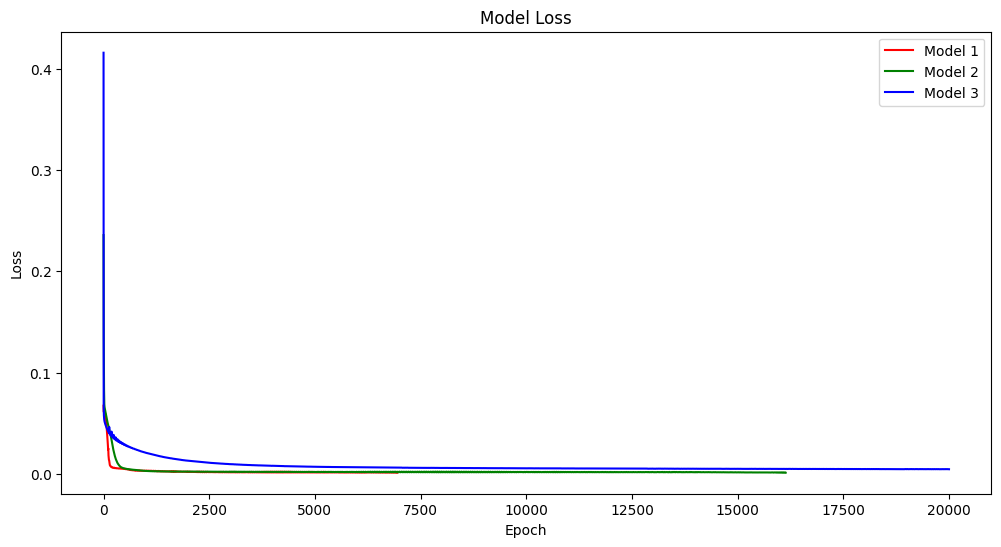

In [55]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

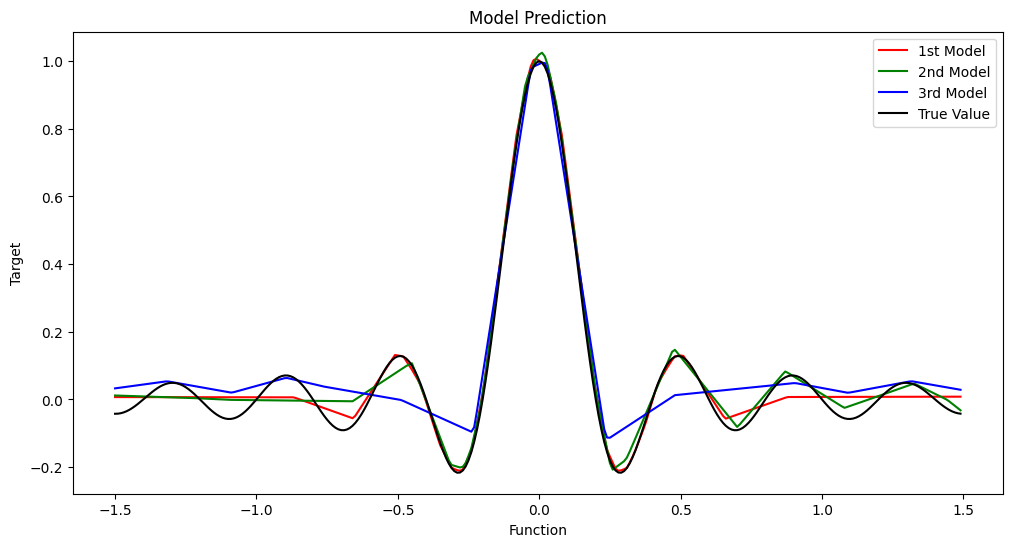

In [56]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

# Function 2

In [57]:
torch.manual_seed(1)

In [58]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


<ipython-input-65-bdb53b6a8b0b>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


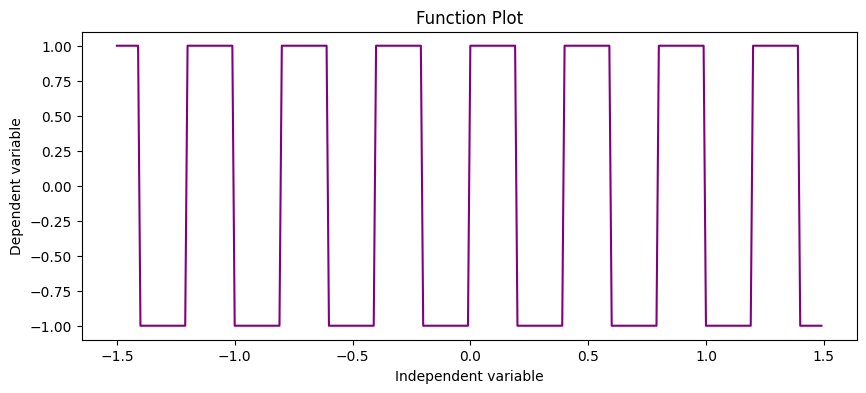

In [65]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "Purple")

plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

## Model 1

In [60]:
model_sign_1 = firstModel()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_sign_1, x, y)

626
Epoch: 500, Loss = 0.9997
Epoch: 1000, Loss = 0.8316
Epoch: 1500, Loss = 0.5150
Epoch: 2000, Loss = 0.3527
Epoch: 2500, Loss = 0.3227
Epoch: 3000, Loss = 0.3183
Epoch: 3500, Loss = 0.3008
Epoch: 4000, Loss = 0.3075
Epoch: 4500, Loss = 0.2835
Epoch: 5000, Loss = 0.2906
Epoch: 5500, Loss = 0.3001
Epoch: 6000, Loss = 0.2854
Epoch: 6500, Loss = 0.2687
Epoch: 7000, Loss = 0.2670
Epoch: 7500, Loss = 0.2568
Epoch: 8000, Loss = 0.2535
Epoch: 8500, Loss = 0.2546
Epoch: 9000, Loss = 0.2647
Epoch: 9500, Loss = 0.2592
Epoch: 10000, Loss = 0.2528
Epoch: 10500, Loss = 0.2459
Epoch: 11000, Loss = 0.2557
Epoch: 11500, Loss = 0.2576
Epoch: 12000, Loss = 0.2525
Epoch: 12500, Loss = 0.2695
Epoch: 13000, Loss = 0.2566
Epoch: 13500, Loss = 0.2512
Epoch: 14000, Loss = 0.2837
Epoch: 14500, Loss = 0.4397
Epoch: 15000, Loss = 0.4147
Epoch: 15500, Loss = 0.2424
Epoch: 16000, Loss = 0.2595
Epoch: 16500, Loss = 0.2757
Epoch: 17000, Loss = 0.2673
Epoch: 17500, Loss = 0.2414
Epoch: 18000, Loss = 0.2402
Epoch: 1

## Model 2

In [61]:
model_sign_2 = secondModel()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_sign_2, x, y)

636
Epoch: 500, Loss = 0.5398
Epoch: 1000, Loss = 0.4535
Epoch: 1500, Loss = 0.4356
Epoch: 2000, Loss = 0.4260
Epoch: 2500, Loss = 0.4208
Epoch: 3000, Loss = 0.4151
Epoch: 3500, Loss = 0.4105
Epoch: 4000, Loss = 0.4077
Epoch: 4500, Loss = 0.4056
Epoch: 5000, Loss = 0.4029
Epoch: 5500, Loss = 0.4007
Epoch: 6000, Loss = 0.4008
Epoch: 6500, Loss = 0.3978
Epoch: 7000, Loss = 0.3958
Epoch: 7500, Loss = 0.3921
Epoch: 8000, Loss = 0.3876
Epoch: 8500, Loss = 0.3854
Epoch: 9000, Loss = 0.3837
Epoch: 9500, Loss = 0.3819
Epoch: 10000, Loss = 0.3804
Epoch: 10500, Loss = 0.3820
Epoch: 11000, Loss = 0.3804
Epoch: 11500, Loss = 0.3859
Epoch: 12000, Loss = 0.3779
Epoch: 12500, Loss = 0.3773
Epoch: 13000, Loss = 0.3774
Epoch: 13500, Loss = 0.3768
Epoch: 14000, Loss = 0.3765
Epoch: 14500, Loss = 0.3779
Epoch: 15000, Loss = 0.3759
Epoch: 15500, Loss = 0.3758
Epoch: 16000, Loss = 0.3752
Epoch: 16500, Loss = 0.3761
Epoch: 17000, Loss = 0.3749
Epoch: 17500, Loss = 0.3741
Epoch: 18000, Loss = 0.3745
Epoch: 1

## Model 3

In [62]:
model_sign_3 = thirdModel()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_sign_3, x, y)

571
Epoch: 500, Loss = 0.9598
Epoch: 1000, Loss = 0.8441
Epoch: 1500, Loss = 0.6496
Epoch: 2000, Loss = 0.5001
Epoch: 2500, Loss = 0.4047
Epoch: 3000, Loss = 0.3444
Epoch: 3500, Loss = 0.3045
Epoch: 4000, Loss = 0.2776
Epoch: 4500, Loss = 0.2594
Epoch: 5000, Loss = 0.2465
Epoch: 5500, Loss = 0.2364
Epoch: 6000, Loss = 0.2294
Epoch: 6500, Loss = 0.2242
Epoch: 7000, Loss = 0.2202
Epoch: 7500, Loss = 0.2174
Epoch: 8000, Loss = 0.2152
Epoch: 8500, Loss = 0.2135
Epoch: 9000, Loss = 0.2119
Epoch: 9500, Loss = 0.2107
Epoch: 10000, Loss = 0.2098
Epoch: 10500, Loss = 0.2088
Epoch: 11000, Loss = 0.2078
Epoch: 11500, Loss = 0.2070
Epoch: 12000, Loss = 0.2067
Epoch: 12500, Loss = 0.2057
Epoch: 13000, Loss = 0.2041
Epoch: 13500, Loss = 0.2014
Epoch: 14000, Loss = 0.2000
Epoch: 14500, Loss = 0.1983
Epoch: 15000, Loss = 0.1968
Epoch: 15500, Loss = 0.1960
Epoch: 16000, Loss = 0.1949
Epoch: 16500, Loss = 0.1939
Epoch: 17000, Loss = 0.1932
Epoch: 17500, Loss = 0.1925
Epoch: 18000, Loss = 0.1919
Epoch: 1

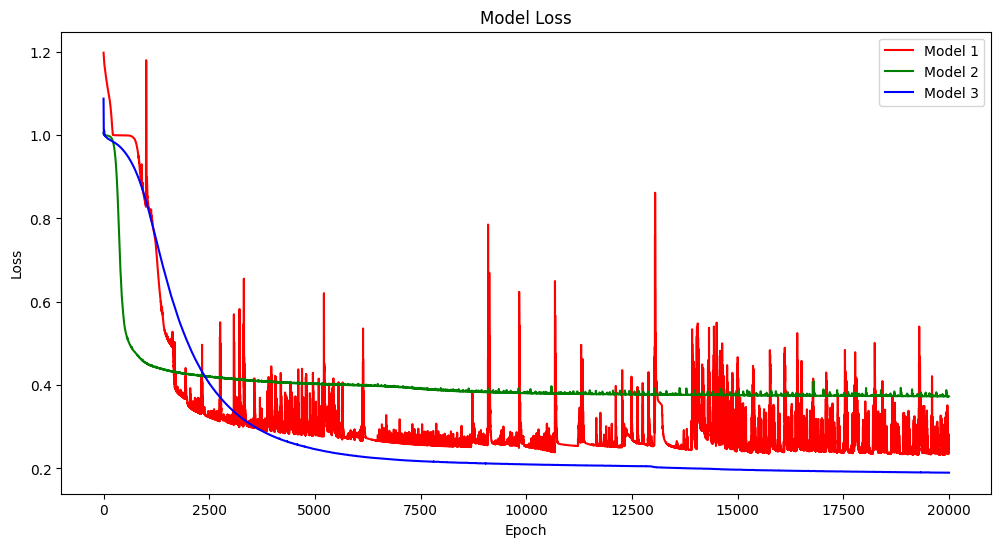

In [63]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

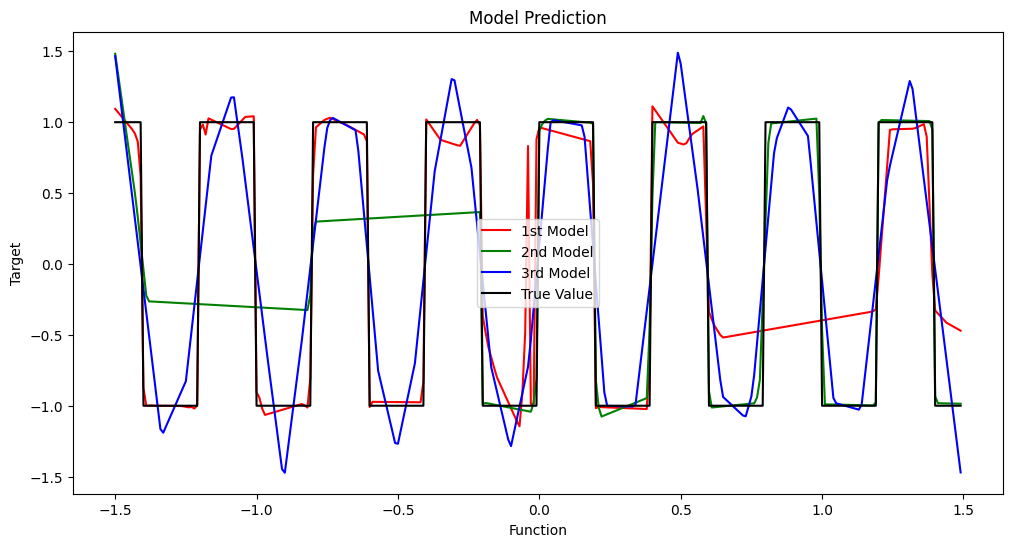

In [64]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()